## Лабораторная работа №1 | Вариант 5

Выполнил:

### 1. Numpy

In [5]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
eye3x3 = np.eye(3)
eye3x3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [4]:
?np.dtype

In [6]:
RGBAdtype = np.dtype([
  ("red", np.uint8),
  ("green", np.uint8),
  ("blue", np.uint8),
  ("alpha", np.uint8)
])
RGBAdtype

dtype([('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('alpha', 'u1')])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [7]:
import warnings
?warnings.filterwarnings

In [8]:
warnings.filterwarnings(action = "ignore", module = "numpy")

4. Создайте случайный вектор размера 10 и отсортируйте его

In [9]:
?np.random.randint

In [10]:
random_vector = np.random.randint(0, 255, 10)
random_vector

sorted_vector = np.sort(random_vector)
sorted_vector

array([ 44, 105, 134, 139, 152, 159, 161, 165, 233, 243])

5. Создайте read-only массив(неизменяемый)

In [11]:
readOnlyArray = np.array([1, 2, 3, 4])
readOnlyArray.flags.writeable = False
#readOnlyArray[1] = 3 - Ошибка

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [128]:
decart_coords = np.random.randint(0, 255, (10, 2))
X,Y = decart_coords[:,0], decart_coords[:,1]
radiuses = np.hypot(X, Y)
angls = np.arctan2(Y,X)

polar_coords = np.column_stack((radiuses, angls))
polar_coords

array([[2.47935475e+02, 1.78410499e-01],
       [1.86818093e+02, 6.29583378e-01],
       [1.92005208e+02, 1.14675503e+00],
       [2.14841802e+02, 8.85528528e-02],
       [3.27140643e+02, 7.01000425e-01],
       [1.78084250e+02, 1.38441354e+00],
       [2.30521149e+02, 1.48031947e-01],
       [6.98569968e+01, 4.12410442e-01],
       [1.80892233e+02, 1.23855665e+00],
       [1.35959553e+02, 1.40081093e+00]])

7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [15]:
?np.meshgrid

In [8]:
Z = np.zeros((10,10), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
Z

array([[(0.        , 0.        ), (0.11111111, 0.        ),
        (0.22222222, 0.        ), (0.33333333, 0.        ),
        (0.44444444, 0.        ), (0.55555556, 0.        ),
        (0.66666667, 0.        ), (0.77777778, 0.        ),
        (0.88888889, 0.        ), (1.        , 0.        )],
       [(0.        , 0.11111111), (0.11111111, 0.11111111),
        (0.22222222, 0.11111111), (0.33333333, 0.11111111),
        (0.44444444, 0.11111111), (0.55555556, 0.11111111),
        (0.66666667, 0.11111111), (0.77777778, 0.11111111),
        (0.88888889, 0.11111111), (1.        , 0.11111111)],
       [(0.        , 0.22222222), (0.11111111, 0.22222222),
        (0.22222222, 0.22222222), (0.33333333, 0.22222222),
        (0.44444444, 0.22222222), (0.55555556, 0.22222222),
        (0.66666667, 0.22222222), (0.77777778, 0.22222222),
        (0.88888889, 0.22222222), (1.        , 0.22222222)],
       [(0.        , 0.33333333), (0.11111111, 0.33333333),
        (0.22222222, 0.33333333), (0.

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [17]:
?np.subtract.outer

In [19]:
X = np.random.randint(0, 255, 5)
Y = np.random.randint(0, 255, 5)

C = 1 / np.subtract.outer(X, Y)
C

array([[-0.00662252,  0.01408451,  0.125     , -0.03225806, -0.01190476],
       [-0.00546448,  0.02564103, -0.04166667, -0.01587302, -0.00862069],
       [-0.00549451,  0.025     , -0.04347826, -0.01612903, -0.00869565],
       [-0.00584795,  0.01960784, -0.08333333, -0.01960784, -0.00961538],
       [-0.00934579,  0.00869565,  0.01923077,  0.07692308, -0.025     ]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [20]:
float_array = np.array([1.2, 3.5, 4.7], dtype=np.float32)

int_array = float_array.astype(np.int32)
int_array

array([1, 3, 4], dtype=int32)

10. Как случайно заменить p элементов в 2D массиве?

In [24]:
?np.random.choice
?np.unravel_index

In [9]:
p = 5

array_2d = np.random.randint(0, 255, (5,5))
print("Массив до замен:\n", array_2d)

flat_indices = np.random.choice(array_2d.size, size=p, replace=False)
row_indices, col_indices = np.unravel_index(flat_indices, array_2d.shape)
array_2d[row_indices, col_indices] = np.random.randint(0, 255, p)

print("Массив после замен:\n", array_2d)

Массив до замен:
 [[102  23   7 132  51]
 [225 229 109  91 210]
 [181 137  68  22  84]
 [177  41  79 244 103]
 [134 118 120 102 218]]
Массив после замен:
 [[102  23   7 132  51]
 [225  63 176  91 210]
 [181 183  68 128  84]
 [177  41  79 244 103]
 [134 118 120 102  87]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Узнайте сколько было на борту человек

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.shape[0]

891

2. Какой медианный и средний возраста пассажиров

In [38]:
df["Age"].median(), df["Age"].mean()

(28.0, 29.69911764705882)

3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [39]:
df[(df["Age"] < 16)]["Survived"].mean(), df[(df["Age"] >= 16)]["Survived"].mean()

(0.5903614457831325, 0.38193343898573695)

4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [48]:
female_and_children = df[(df["Age"] < 16) | ((df["Age"] >= 16) & (df["Sex"] == "female"))]
male = df[(df["Age"] >= 16) & (df["Sex"] == "male")]

female_and_children["Survived"].mean(), male["Survived"].mean() #Да

(0.7242524916943521, 0.17433414043583534)

5. Зависит ли выживаемость от класса обслуживания?

In [47]:
df.groupby(["Pclass"])["Survived"].mean() #Да


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


6. Посчитайте средний возраст умерших женщин и мужчин

In [41]:
df[df["Sex"] == "female"].groupby(["Survived"])["Age"].mean()[0], df[df["Sex"] == "male"].groupby(["Survived"])["Age"].mean()[0]

(25.046875, 31.618055555555557)

7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [46]:
df[df["SibSp"] + df["Parch"] >= 1]["Survived"].mean(), df[df["SibSp"] + df["Parch"] == 0]["Survived"].mean() #~Более чем в полтора раза

(0.5056497175141242, 0.30353817504655495)

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [45]:
df.groupby(["Survived"])["Fare"].mean() #~В два раза

,Fare
Survived,
0,22.117887
1,48.395408


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [43]:
df[(df["Pclass"] == 2) & (df['Survived'] == 1)]["Age"].max(), df[(df["Pclass"] == 2) & (df['Survived'] == 1)]["Age"].min()

(62.0, 0.67)

10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [15]:
male = df[df["Sex"] == 'male']
male[(male['Age'] >= 18) & (male['Age'] < 30)]['Survived'].mean(), male[male['Age'] >= 30]['Survived'].mean() #Небольшие расхождения в пределах 5% - гипотеза неверна

(0.1564245810055866, 0.19444444444444445)

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Постройте гистограмму распределения возростов пассажиров

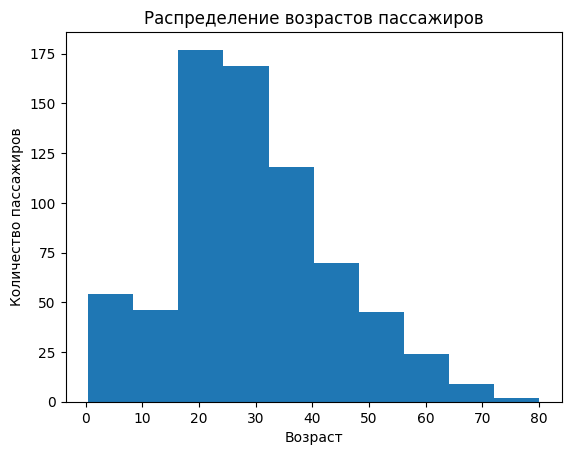

In [50]:
plt.hist(df["Age"])

plt.title("Распределение возрастов пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")

plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

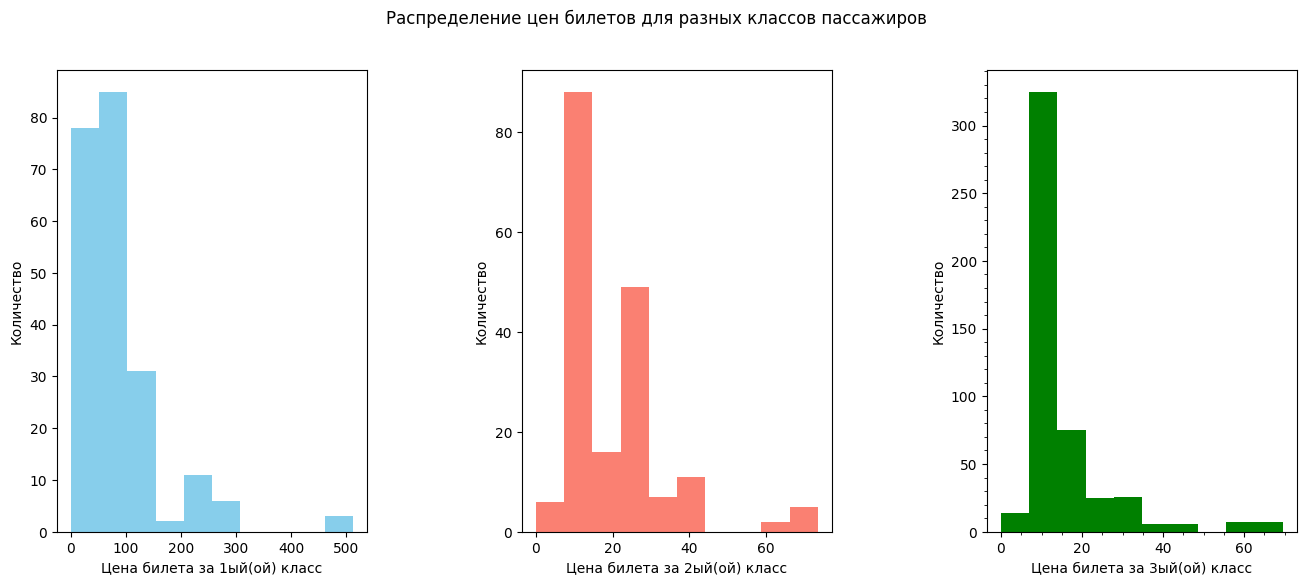

In [17]:
class_fares = (df[df['Pclass'] == 1]['Fare'], df[df['Pclass'] == 2]['Fare'], df[df['Pclass'] == 3]['Fare'])
colors = ('skyblue', 'salmon', 'green')

plt.figure(figsize=(16, 6))

for i in range(0, 3):
  plt.subplot(1, 3, i + 1)
  plt.hist(class_fares[i], color=colors[i], label='Class' + str(i + 1))
  plt.xlabel('Цена билета за ' + str(i + 1) + 'ый(ой) класс')
  plt.ylabel('Количество')


plt.suptitle('Распределение цен билетов для разных классов пассажиров')

plt.minorticks_on()
plt.subplots_adjust(wspace=0.5)
plt.show()

3. Постройте зависимость цены от возраста пассажира

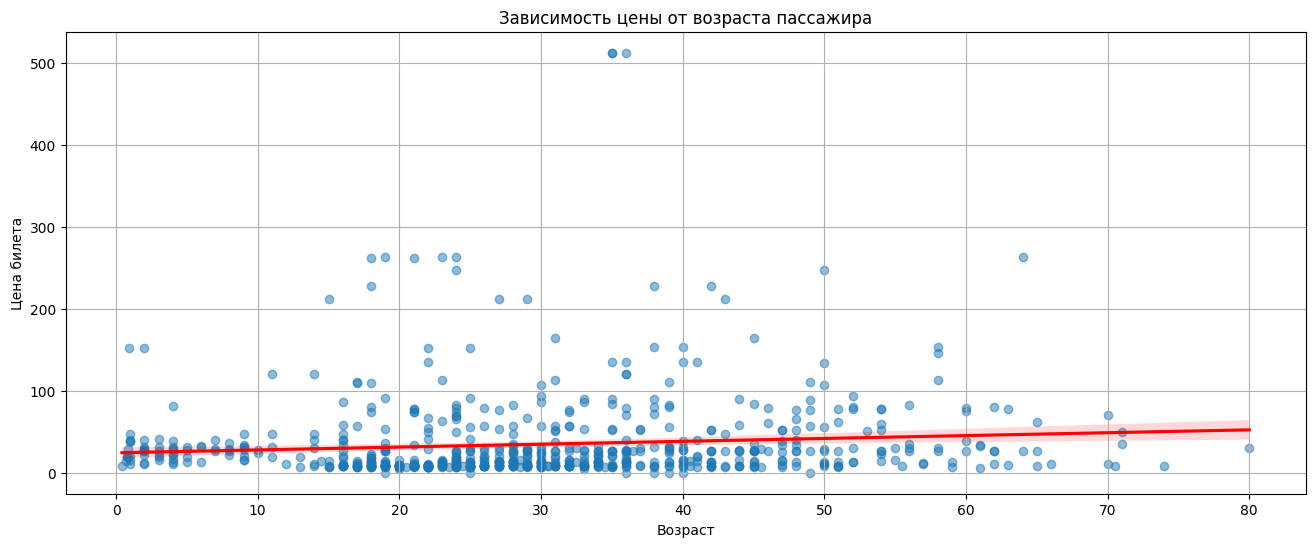

In [58]:
plt.figure(figsize=(16, 6))

plt.title('Зависимость цены от возраста пассажира')

sns.regplot(data=df, x="Age", y="Fare",scatter_kws={"alpha":0.5}, line_kws={
                                                                      "linestyle":"-",
                                                                      "color": "red"
                                                                      })

plt.xlabel('Возраст')
plt.ylabel('Цена билета')

plt.grid(True)
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

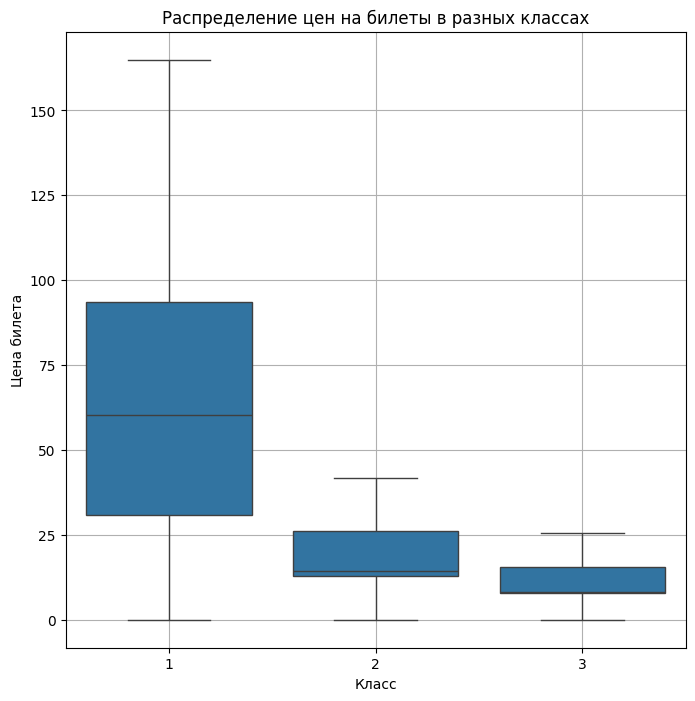

In [68]:
plt.figure(figsize=(8, 8))

sns.boxplot(data=df, x="Pclass", y="Fare", showfliers=False)

plt.title('Распределение цен на билеты в разных классах')
plt.xlabel('Класс')
plt.ylabel('Цена билета')

plt.grid(True)
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

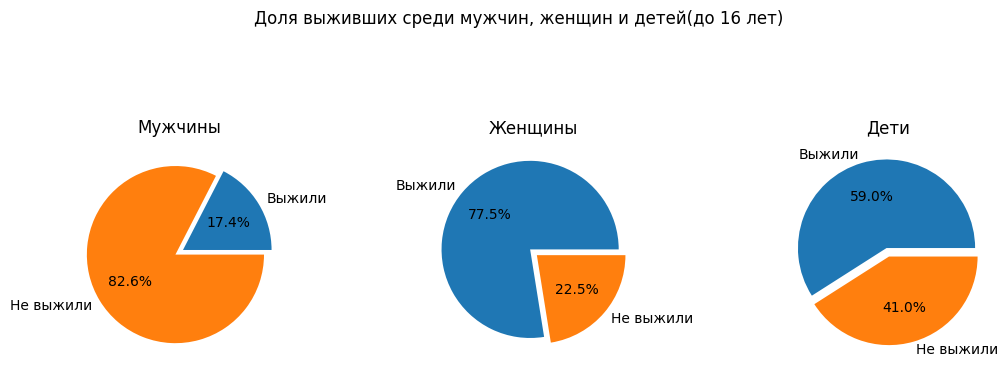

In [20]:
male = df[(df['Age'] >= 16) & (df["Sex"] == 'male')]
female = df[(df['Age'] >= 16) & (df["Sex"] == 'female')]
children = df[df['Age'] < 16]
info = (male, female, children)
labels = ("Мужчины", 'Женщины', 'Дети')

plt.figure(figsize=(12, 5))

for i in range(0, 3):
  plt.subplot(1, 3, i + 1)
  plt.pie(
        (info[i]["Survived"].mean(), 1 - info[i]["Survived"].mean()),
        labels=["Выжили", "Не выжили"],
        autopct='%1.1f%%',
        explode=[0.05, 0.05],
        )
  plt.title(labels[i])


plt.subplots_adjust(wspace=0.6)
plt.suptitle("Доля выживших среди мужчин, женщин и детей(до 16 лет)")
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

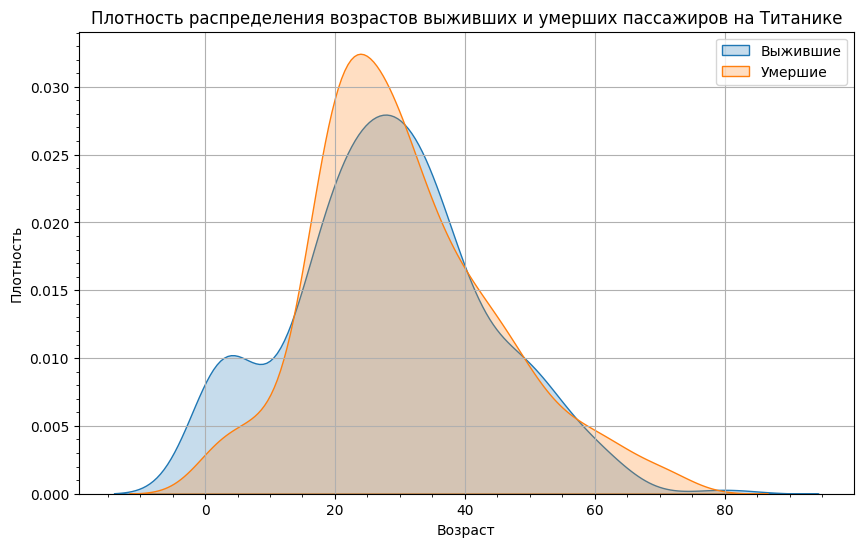

In [22]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], fill=True, label='Выжившие')
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], fill=True, label='Умершие')

plt.title('Плотность распределения возрастов выживших и умерших пассажиров на Титанике')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()

Среди распределения возрастов выживших пассажиров (синяя кривая) выражены два экстремума в районе возрастов детей и людей от 25 до 30 лет. Это указавыет на основные возрастные группы выживших.
Среди же умерших пассажиров (оранжевая линия) виден пик в возрастной группе от 20 до 25 лет.
Эти данные позволяют визуально определить основные возрастные подгруппы в группах выживших и умерших пассажиров.
Также можно сделать выводы, что детей старались спасать в первую очередь.


---


Также можно заметить, что распределение возрастов погибших пассажиров имеет более длинный правый "хвост", что означает, что среди погибших было больше пассажиров старших возрастов (после 60 лет). Это говорит о том, что пассажиры старших возрастных групп были менее защищены и имели меньше шансов на выживание.


7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

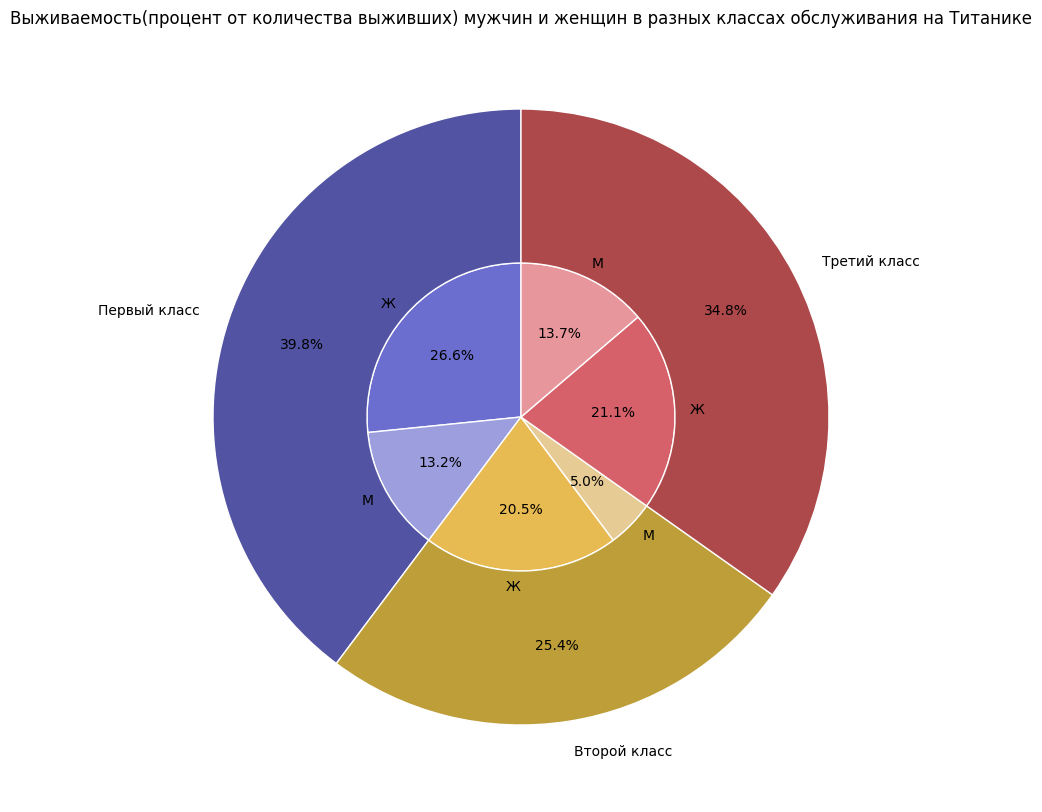

In [126]:
survival_count_by_class = df.groupby(['Pclass', 'Sex'])['Survived'].sum()
survival_count = df.groupby(['Pclass'])['Survived'].sum()
radius=1
offset=0.5
cmap = plt.get_cmap("tab20b")

fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(survival_count_by_class,
       radius=radius-offset,
       wedgeprops=dict(width=offset, edgecolor='w'),
       startangle=90,
       autopct='%1.1f%%',
       labels=np.array(['Ж', 'М']*3).flatten(),
       colors=cmap(np.array([2, 3, 10, 11, 14, 15])))

ax.pie(survival_count,
       radius=radius,
       colors=cmap(np.array([1, 9, 13])),
       wedgeprops=dict(width=offset, edgecolor='w'),
       startangle=90,
       autopct='%1.1f%%',
       pctdistance=0.75,
       labels=('Первый класс', 'Второй класс', 'Третий класс'))



plt.title('Выживаемость(процент от количества выживших) мужчин и женщин в разных классах обслуживания на Титанике')
plt.show()